In [2]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator 
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np
from qiskit.circuit.library import IQP
from qiskit.quantum_info import random_hermitian 
from qiskit_ibm_runtime import QiskitRuntimeService,SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeKyoto
import json

In [3]:
service=QiskitRuntimeService()

In [4]:
n_qubits=127
mat=np.real(random_hermitian(n_qubits,seed=1234))
circuit=IQP(mat)
circuit.measure_all()

In [5]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp 
from qiskit_ibm_runtime import Session
backend=service.least_busy(
    operational=True,
    simulator=False
)
backend.name

'ibm_osaka'

In [29]:
num_qubits=100
bell=QuantumCircuit(num_qubits)
bell.h(0)
for i in range (num_qubits-1): 
    bell.cx(i,i+1)

isa_bell=transpile(bell,backend)
obs=SparsePauliOp(["Z"*num_qubits])
isa_obs=obs.apply_layout(isa_bell.layout)


In [31]:
estimator=Estimator(backend)
pub=(isa_bell,isa_obs)
est_job_bell=estimator.run([pub])
print(f"Job Id::{est_job_bell.job_id()}")
result=est_job_bell.result()[0]

Job Id::ctb1hyqvmx80008rjy10


In [32]:
data=result.data 
evs=data.evs 
std=data.stds 
print(f"Num Qubits:: {bell.num_qubits}")
print(f"<ZZ> = {evs:.3f}+-{std:.3f}")

Num Qubits:: 100
<ZZ> = 0.667+-0.534


In [ ]:
data=result.data 
evs=data.evs 
std=data.stds 
print(f"Num Qubits:: {bell.num_qubits}")
print(f"<ZZ> = {evs:.3f}+-{std:.3f}")

In [8]:
count=1
itr=[]
Obs_records=[]
std_records=[]

In [46]:
with Session(backend=backend, service=service) as session:
    for i in range (10,101,10):
        bell=QuantumCircuit(i)
        bell.h(0)
        for j in range (i-1): 
           bell.cx(j,j+1)
        isa_bell=transpile(bell,backend)
        obs=SparsePauliOp(["Z"*i])
        isa_obs=obs.apply_layout(isa_bell.layout)
        estimator=Estimator(backend)
        pub=(isa_bell,isa_obs)
        est_job_bell=estimator.run([pub])
        print(f"Num Qubits:: {bell.num_qubits}")
        print(f"Job Id::{est_job_bell.job_id()} for iteration {count}")
        result=est_job_bell.result()[0]
        count+=1
        data=result.data
        evs=data.evs
        std=data.stds 
        Obs_records.append(evs)
        std_records.append(std)

Num Qubits:: 10
Job Id::ctb1q6c7pt6g0084kss0 for iteration 1
Num Qubits:: 20
Job Id::ctb1wd17pt6g0084ktqg for iteration 2
Num Qubits:: 30
Job Id::ctb1wm2df6zg0080sh40 for iteration 3
Num Qubits:: 40
Job Id::ctb1wvb0jacg008w66h0 for iteration 4
Num Qubits:: 50
Job Id::ctb1x6wc2sk0008c3kzg for iteration 5


In [9]:
job01=service.job("ctb1q6c7pt6g0084kss0")
result01=job01.result()[0]
Obs_records.append(result01.data.evs)
std_records.append(result01.data.stds)

In [10]:
job02=service.job("ctb1wd17pt6g0084ktqg")
result02=job02.result()[0]
Obs_records.append(result02.data.evs)
std_records.append(result02.data.stds)

In [11]:
job03=service.job("ctb1wm2df6zg0080sh40")
result03=job03.result()[0]
Obs_records.append(result03.data.evs)
std_records.append(result03.data.stds)

In [12]:
job04=service.job("ctb1wvb0jacg008w66h0")
result04=job04.result()[0]
Obs_records.append(result04.data.evs)
std_records.append(result04.data.stds)

In [13]:
import matplotlib.pyplot as plt

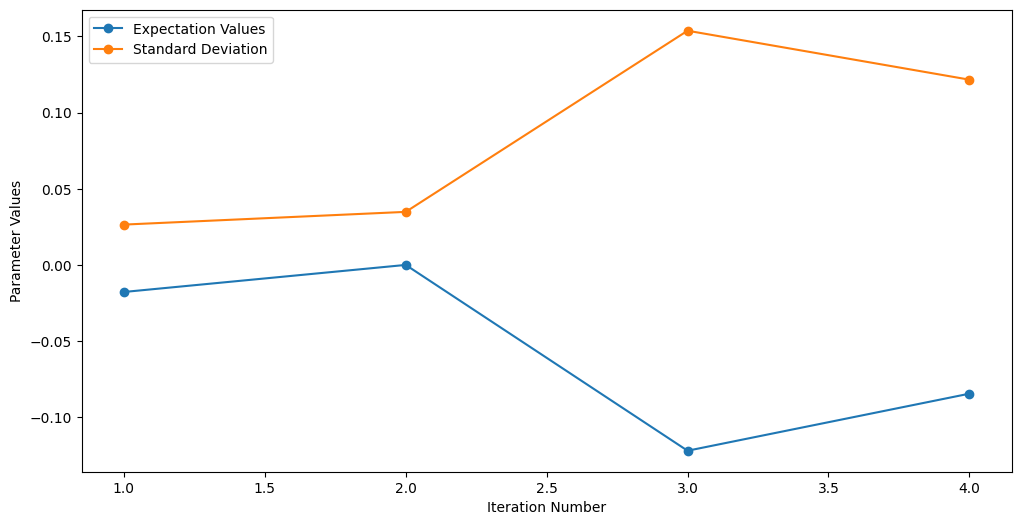

In [19]:
Iter=[i for i in range (1,5)]
plt.figure(figsize=(12,6))
plt.plot(Iter,Obs_records,"o-",label="Expectation Values")
plt.plot(Iter,std_records,"o-",label="Standard Deviation")
plt.ylabel("Parameter Values")
plt.xlabel("Iteration Number")
plt.legend()
plt.show()